# This notebook explores a variety of training methods

## Imports 
<hr>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import math


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [24]:
def plotRegression(truth, pred):
    plt.figure(figsize=(10,10))
    plt.scatter(truth, pred)
    plt.grid()
    plt.xlabel("Truth")
    plt.ylabel("Predicted")
    plt.title("Truth Plotted against actual value")
    plt.plot([0,1], [0,1], 'r')
    plt.show()

## Load the data
<hr>

In [ ]:
####### Scaled by dividing data in each column by maximum value #######
data_filename = '/Users/brad/Desktop/CS6620/Project/Data/dataVersion1.npy' 
truth_filename = '/Users/brad/Desktop/CS6620/Project/Data/truthVersion1.npy' 

In [4]:
############## This data has not been normalized/scaled at all ###################
dataUnscaled_filename = '/Users/brad/Desktop/CS6620/Project/Data/nonScaledData.npy' 
truthUnscaled_filename = '/Users/brad/Desktop/CS6620/Project/Data/nonScaledTruth.npy' 

In [4]:
############## This data has not been normalized/scaled at all ###################
############## This data Has extra columns for month, hour, day, solar elevation, azimuth, zenith ###################
dataUnscaled_filename = '/Users/brad/Desktop/CS6620/Project/Data/nonScaledDataV2.npy' 
truthUnscaled_filename = '/Users/brad/Desktop/CS6620/Project/Data/nonScaledTruthV2.npy' 

In [5]:
x = np.load(dataUnscaled_filename)
y = np.load(truthUnscaled_filename)
print('Before split')
print(x.shape)
print(y.shape)

Before split
(5267, 41)
(5267,)


In [6]:

train_length = int(x.shape[0] * 0.85)
x_train = x[0 : train_length].reshape(-1, x.shape[1])
y_train = y[0 : train_length].reshape(-1,1)
x_test = x[train_length : ].reshape(-1, x.shape[1])
y_test = y[train_length : ].reshape(-1,1)
print('After split and reshape')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

After split and reshape
(4476, 41)
(4476, 1)
(791, 41)
(791, 1)


## Explore different methods of scaling 
<hr>

In [17]:
# Scale 
sc_X = StandardScaler()
sc_y = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [7]:
# MinMaxScale a different way
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
x_train = scalerX.fit_transform(x_train)
x_test = scalerX.fit_transform(x_test)
y_train = scalerY.fit_transform(y_train)
y_test = scalerY.fit_transform(y_test)

In [ ]:
xtrain

## Try fitting the data with RandomForestRegressors
<hr>

In [27]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [28]:
# Training data r^2 value 
y_train_pred = regressor.predict(x_train)
r2_score(y_train, y_train_pred)

0.9756360942460424

In [29]:
# testing data r^2 value 
y_test_pred = regressor.predict(x_test)
r2_score(y_test, y_test_pred)

0.4453393122202427

In [30]:
def computeAverageError(pred, y):
    err = []
    for i in range(len(pred)):
        err.append(abs((y[i] - pred[i])/(y[i] + 1e-6)))

    return sum(err)/ len(err)

In [31]:
computeAverageError(y_test_pred, y_test)

211.01155655351002

In [32]:
computeAverageError(y_train_pred, y_train)

3.338306800607639

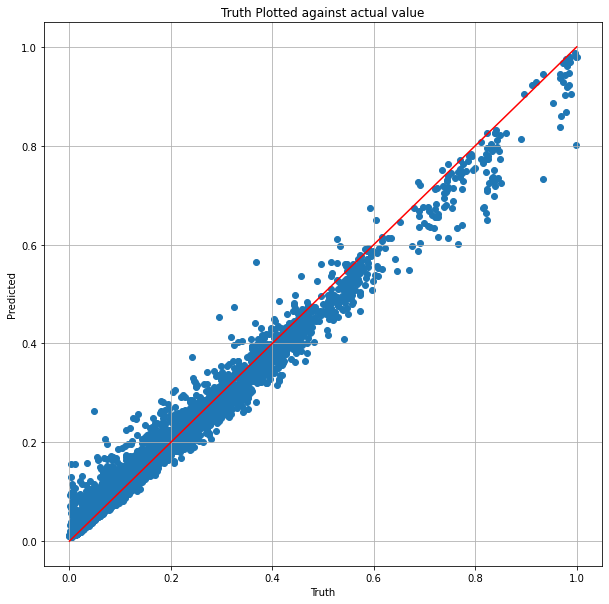

In [33]:
plotRegression(y_train, y_train_pred)

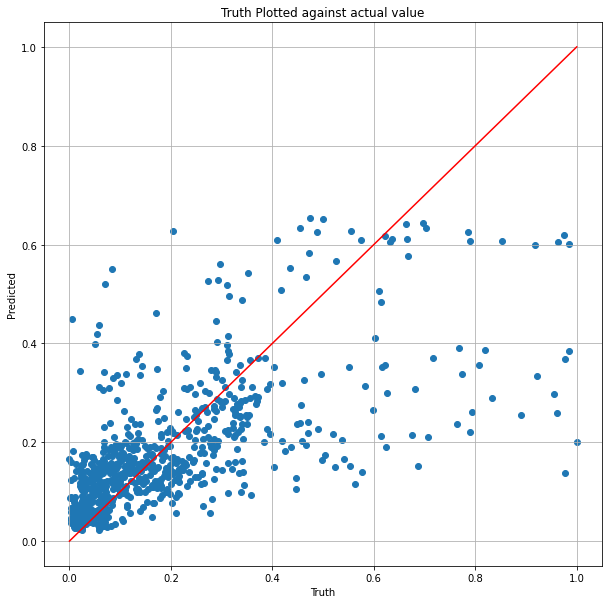

In [34]:
plotRegression(y_test, y_test_pred)

## Support Vector Regression 
<hr>

In [11]:
sc_X = StandardScaler()
sc_y = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

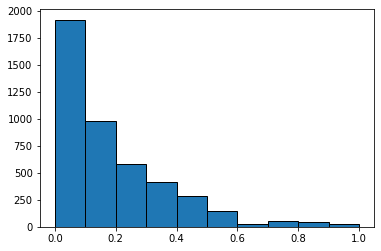

In [17]:
plt.figure()
plt.hist(y_train, edgecolor='black')
plt.show()

### Before transform, data has range () after transform, from from (-1,5) (Using Standard scaler)
### Using MinMaxScaler gives range between 0-1


In [18]:
# Reshape Y 
print('Before reshaping: ')
print(y_train.shape)
print(y_test.shape)

y_train = y_train.flatten()
y_test = y_test.flatten()
print('After reshaping: ')
print(y_train.shape)
print(y_test.shape)

Before reshaping: 
(4476, 1)
(791, 1)
After reshaping: 
(4476,)
(791,)


In [35]:
regressorSVR = SVR(kernel='rbf')
regressorSVR.fit(x_train, y_train)

SVR()

In [36]:
y_train_pred_svr = regressorSVR.predict(x_train)
y_test_pred_svr = regressorSVR.predict(x_test)

In [39]:
print(r2_score(y_train, y_train_pred_svr))
print(r2_score(y_test, y_test_pred_svr))

0.7293601119238622
0.2993561071087152


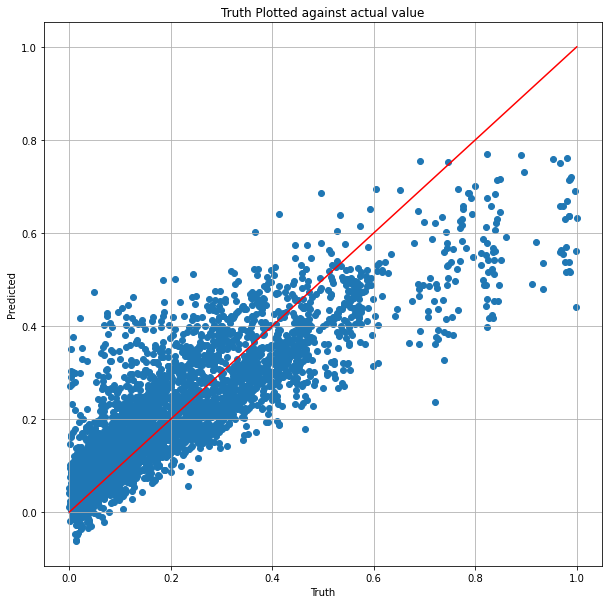

In [40]:
plotRegression(truth=y_train, pred=y_train_pred_svr)

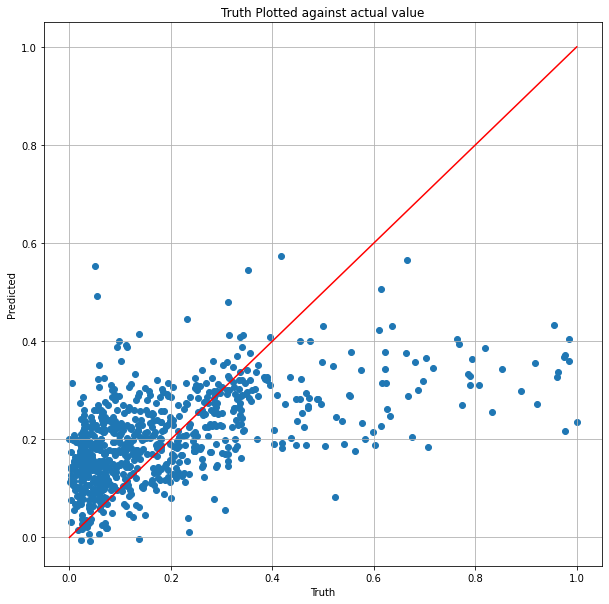

In [42]:
plotRegression(truth=y_test, pred=y_test_pred_svr)

## Using keras RNN
<hr>

In [45]:
import tensorflow as tf 
from tensorflow import keras
from keras import backend as K
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.layers.experimental import preprocessing

In [46]:
# not sure if this is right. 
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [50]:
model = Sequential()
model.add(LSTM(128, input_shape=(x.shape[1],1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
# optimizer 
opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-5)
# compile
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[coeff_determination])

In [51]:
def plot_loss(history):
  plt.figure()
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()
  plt.figure()
  plt.plot(history.history['coeff_determination'], label='R^2')
  plt.plot(history.history['val_coeff_determination'], label='validation R^2')
  plt.xlabel('Epoch')
  plt.ylabel('R^2')
  plt.legend()
  plt.show()

In [52]:
x_train = x_train.reshape(-1,x.shape[1],1)
x_test = x_test.reshape(-1,x.shape[1],1)

In [53]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

Epoch 1/100
299/299 [==============================] - 9s 25ms/step - loss: 0.0271 - coeff_determination: 0.0470 - val_loss: 0.0281 - val_coeff_determination: -1.6403
Epoch 2/100
299/299 [==============================] - 6s 21ms/step - loss: 0.0207 - coeff_determination: 0.2165 - val_loss: 0.0279 - val_coeff_determination: -2.5345
Epoch 3/100
299/299 [==============================] - 6s 21ms/step - loss: 0.0203 - coeff_determination: 0.2446 - val_loss: 0.0254 - val_coeff_determination: -3.7690
Epoch 4/100
299/299 [==============================] - 6s 21ms/step - loss: 0.0199 - coeff_determination: 0.3310 - val_loss: 0.0259 - val_coeff_determination: -3.6333
Epoch 5/100
299/299 [==============================] - 7s 22ms/step - loss: 0.0200 - coeff_determination: 0.2296 - val_loss: 0.0270 - val_coeff_determination: -2.9810
Epoch 6/100
299/299 [==============================] - 7s 23ms/step - loss: 0.0199 - coeff_determination: 0.3145 - val_loss: 0.0297 - val_coeff_determination: -2.536

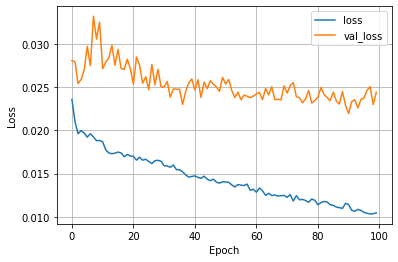

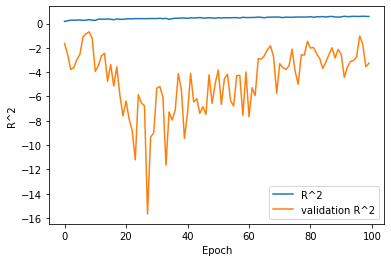

In [16]:
history= model.fit(x=x_train, y=y_train, batch_size=10, epochs=100, validation_data=(x_test, y_test))
plot_loss(history)

In [17]:
y_pred_train_LSTM = model.predict(x_train)
print(r2_score(y_train, y_pred_train_LSTM))
y_pred_LSTM = model.predict(x_test)
print(r2_score(y_test, y_pred_test_LSTM))

0.7306957051226208
0.35039304525860626


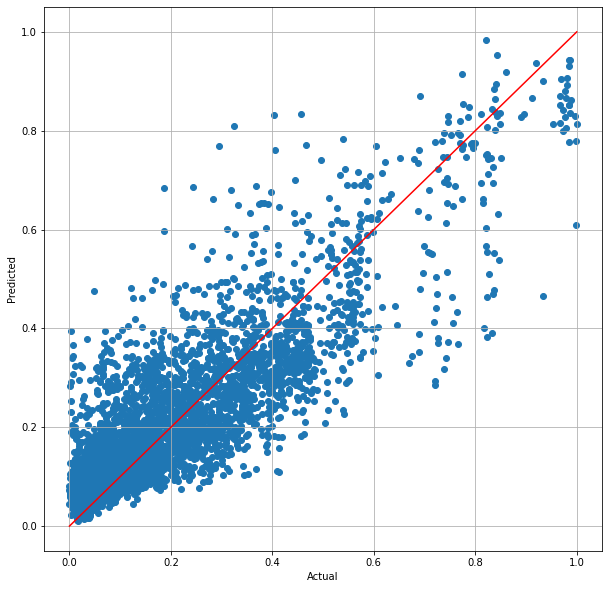

In [18]:
plotRegression(y_train, y_pred_train_LSTM)
plotRegression(y_test, y_pred_test_LSTM)